<a href="https://colab.research.google.com/github/Stevejain22/Heart-Disease-Prediction/blob/main/MyDIssertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Initiate and Configure Spark**

Student 1: Steve Ranjeet Jain. id-u2349486




```
# This is formatted as code
```


# **loading libraries**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing libraries
from ast import increment_lineno
import numpy as np
import plotly.graph_objects as go
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pandas as pd

# **loading my datasets**

In [3]:
#loading my first data set dataset
first = pd.read_csv('1.csv')
first.head(5)
first

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
#summary of first dataset
s = first.describe().round(0)
s



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,149.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,1.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [5]:
#loading my second data set dataset
second = pd.read_csv('2.csv')
second


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [6]:
#summary of second dataset
s1 = second.describe().round(0)
s1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0
mean,55.0,1.0,2.0,132.0,247.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,1.0,0.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,2.0,120.0,211.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,56.0,1.0,2.0,130.0,243.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,0.0,0.0
75%,61.0,1.0,3.0,140.0,276.0,0.0,2.0,166.0,1.0,2.0,1.0,1.0,2.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,3.0,2.0,1.0


In [7]:
#loading third data set
third = pd.read_csv('3.csv')
third

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
##summary of third dataset
s3 = third.describe().round(0)
s3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [9]:
first.dropna(inplace=True)
null_values = first.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
second.dropna(inplace=True)
null_values = second.isnull().sum()
print(null_values)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [11]:
third.dropna(inplace=True)
null_values = third.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [12]:
df = pd.DataFrame(first)

In [13]:
#df = df.drop('', axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
df = pd.DataFrame(second)

In [15]:
df = pd.DataFrame(third)

In [16]:
#loading fourth data set
fourth = pd.read_csv('4.csv')
fourth

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3,0
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1,0
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2,0


In [17]:
##summary of third dataset
s4 = fourth.describe().round(0)
s4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0
mean,54.0,1.0,2.0,131.0,250.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,0.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,48.0,0.0,2.0,120.0,213.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,55.0,1.0,2.0,130.0,245.0,0.0,2.0,154.0,0.0,1.0,1.0,0.0,1.0,0.0
75%,61.0,1.0,3.0,140.0,280.0,0.0,2.0,166.0,1.0,2.0,1.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,3.0,3.0,1.0


In [18]:
#changing the name of the column of the second data set
new_columns = {'condition': 'target'}
second = second.rename(columns=new_columns)
second

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [19]:
#loading my first data set dataset
fifth = pd.read_csv('6.csv')
fifth.head(5)
fifth


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca,thal
0,40,1,2,140,289,0,0,172,0,0.0,1,0,0,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1,3,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0,2
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1,1,2
1186,68,1,4,144,193,1,0,141,0,3.4,2,1,2,2
1187,57,1,4,130,131,0,0,115,1,1.2,2,1,2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2,1,0,1


In [20]:
#summary of third dataset
s5 = fifth.describe().round(0)
s5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca,thal
count,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0,1190.0
mean,54.0,1.0,3.0,132.0,210.0,0.0,1.0,140.0,0.0,1.0,2.0,1.0,1.0,1.0
std,9.0,0.0,1.0,18.0,101.0,0.0,1.0,26.0,0.0,1.0,1.0,0.0,1.0,1.0
min,28.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0,0.0,-3.0,0.0,0.0,0.0,0.0
25%,47.0,1.0,3.0,120.0,188.0,0.0,0.0,121.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,54.0,1.0,4.0,130.0,229.0,0.0,0.0,140.0,0.0,1.0,2.0,1.0,1.0,1.0
75%,60.0,1.0,4.0,140.0,270.0,0.0,2.0,160.0,1.0,2.0,2.0,1.0,2.0,2.0
max,77.0,1.0,4.0,200.0,603.0,1.0,2.0,202.0,1.0,6.0,3.0,1.0,3.0,2.0


In [21]:
#loading fifth data set
sixth = pd.read_csv('5.csv')
sixth

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [22]:
#null values
sixth.dropna(inplace=True)
null_values = fifth.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
ca          0
thal        0
dtype: int64


In [23]:
sixth.drop('id', axis=1, inplace=True)


mapping = {'male':1, 'female':0}  # Define the mapping of string values to integers

sixth['sex'] = sixth['sex'].map(mapping)



mapping = {'yes': 1, 'no': 0}  # Define the mapping of string values to integers
sixth['target'] = sixth['target'].map(mapping)

In [24]:
s6 = sixth.describe().round(0)
s6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0,293.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,51.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,47.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,167.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [25]:
sixth

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,0
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0


In [26]:
fifth.dropna(inplace=True)
null_values = fifth.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
ca          0
thal        0
dtype: int64


# **merging all the datasets**

In [27]:
merged = pd.concat([first, second, third,fourth,fifth,sixth], axis=0)
merged

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,0
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0


In [28]:
merged.dropna(inplace=True)
null_values = merged.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [29]:
s7 = merged.describe().round(0)
s7

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0,3378.0
mean,54.0,1.0,2.0,132.0,234.0,0.0,1.0,146.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,75.0,0.0,1.0,24.0,0.0,1.0,1.0,1.0,1.0,0.0
min,28.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,-3.0,0.0,0.0,0.0,0.0
25%,47.0,0.0,1.0,120.0,205.0,0.0,0.0,129.0,0.0,0.0,1.0,0.0,1.0,0.0
50%,55.0,1.0,2.0,130.0,236.0,0.0,0.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
75%,61.0,1.0,3.0,140.0,274.0,0.0,1.0,163.0,1.0,2.0,2.0,2.0,2.0,1.0
max,77.0,1.0,4.0,200.0,603.0,1.0,2.0,202.0,1.0,6.0,3.0,4.0,3.0,1.0


# **unique values for all the dataset**

In [30]:
u1= merged['sex'].unique()

# Print the unique values
print(u1)

[1 0]


In [31]:
u2= merged['cp'].unique()

# Print the unique values
print(u2)

[0 1 2 3 4]


In [32]:
u3= merged['fbs'].unique()

# Print the unique values
print(u3)

[0 1]


In [33]:
u4= merged['target'].unique()

# Print the unique values
print(u4)

[0 1]


In [34]:
u5 = merged['slope'].unique()

# Print the unique values
print(u5)

[2 0 1 3]


In [35]:
u6= merged['ca'].unique()

# Print the unique values
print(u6)

[2 0 1 3 4]


In [36]:
u7 = merged['chol'].unique()

# Print the unique values
print(u7)

[212. 203. 174. 294. 248. 318. 289. 249. 286. 149. 341. 210. 298. 204.
 308. 266. 244. 211. 185. 223. 208. 252. 209. 307. 233. 319. 256. 327.
 169. 131. 269. 196. 231. 213. 271. 263. 229. 360. 258. 330. 342. 226.
 228. 278. 230. 283. 241. 175. 188. 217. 193. 245. 232. 299. 288. 197.
 315. 215. 164. 326. 207. 177. 257. 255. 187. 201. 220. 268. 267. 236.
 303. 282. 126. 309. 186. 275. 281. 206. 335. 218. 254. 295. 417. 260.
 240. 302. 192. 225. 325. 235. 274. 234. 182. 167. 172. 321. 300. 199.
 564. 157. 304. 222. 184. 354. 160. 247. 239. 246. 409. 293. 180. 250.
 221. 200. 227. 243. 311. 261. 242. 205. 306. 219. 353. 198. 394. 183.
 237. 224. 265. 313. 340. 259. 270. 216. 264. 276. 322. 214. 273. 253.
 176. 284. 305. 168. 407. 290. 277. 262. 195. 166. 178. 141. 339. 468.
 518. 194. 365. 202. 297. 412. 163. 529. 100. 238. 139. 291. 329. 147.
  85. 179. 392. 466. 129. 338. 156. 272. 393. 161. 292. 388. 331. 279.
 603. 159. 190. 320. 287. 404. 312. 251. 328. 285. 280. 132. 117. 173.
 336. 

In [37]:
u8= merged['oldpeak'].unique()

# Print the unique values
print(u8)

[ 1.   3.1  2.6  0.   1.9  4.4  0.8  3.2  1.6  3.   0.7  4.2  1.5  2.2
  1.1  0.3  0.4  0.6  3.4  2.8  1.2  2.9  3.6  1.4  0.2  2.   5.6  0.9
  1.8  6.2  4.   2.5  0.5  0.1  2.1  2.4  3.8  2.3  1.3  3.5  5.   1.7
 -0.9 -2.6 -1.5 -0.1 -1.  -1.1 -0.7 -0.8  3.7 -0.5 -2. ]


In [38]:
u9= merged['thal'].unique()

# Print the unique values
print(u9)

[3 2 1 0]


In [39]:
u10= merged['age'].unique()

# Print the unique values
print(u10)

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74 36 32 31 33 28 30 72
 73 75]


In [40]:
u11= merged['trestbps'].unique()

# Print the unique values
print(u11)

[125. 140. 145. 148. 138. 100. 114. 160. 120. 122. 112. 132. 118. 128.
 124. 106. 104. 135. 130. 136. 180. 129. 150. 178. 146. 117. 152. 154.
 170. 134. 174. 144. 108. 123. 110. 142. 126. 192. 115.  94. 200. 165.
 102. 105. 155. 172. 164. 156. 101. 158. 113. 190.  92.  98. 133.  95.
  80. 137. 185. 116.   0. 139. 131. 141.  96. 143. 127.]


In [41]:
u12= merged['restecg'].unique()

# Print the unique values
print(u12)

[1 0 2]


In [42]:
u13= merged['thalach'].unique()

# Print the unique values
print(u13)

[168. 155. 125. 161. 106. 122. 140. 145. 144. 116. 136. 192. 156. 142.
 109. 162. 165. 148. 172. 173. 146. 179. 152. 117. 115. 112. 163. 147.
 182. 105. 150. 151. 169. 166. 178. 132. 160. 123. 139. 111. 180. 164.
 202. 157. 159. 170. 138. 175. 158. 126. 143. 141. 167.  95. 190. 118.
 103. 181. 108. 177. 134. 120. 171. 149. 154. 153.  88. 174. 114. 195.
 133.  96. 124. 131. 185. 194. 128. 127. 186. 184. 188. 130.  71. 137.
  99. 121. 187.  97.  90. 129. 113.  98.  87. 100.  82. 135.  94. 110.
  92. 176. 119. 102.  91.  93.  77. 104.  72.  86.  63.  83.  60.  70.
  67.  78.  84.  80. 107.  69.  73.]


In [43]:
u14= merged['exang'].unique()

# Print the unique values
print(u14)

[0 1]


In [44]:
#mer1= pd.concat([merged,sixth], axis=0)
#mer1


#dum=pd.get_dummies(mer1.sex)
#dum.columns


#mer
#mer.drop('sex', axis=1, inplace=True)
#mer=pd.concat([mer1,dum],axis='columns')
#mer

In [45]:
#Merging the 3 data sets
#merged = pd.merge(first, second, on=['age'], how='outer')
#merged = pd.merge(merged, third, on=['age'], how='outer')
#merged

In [46]:
print(merged.shape)

(3378, 14)


In [47]:
print(merged.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [48]:
#merged= pd.merge(first, second, on='age')
#merged= pd.merge(merged, third, on='age').drop_duplicates(subset='age').reset_index(drop=True)

# Display the merged DataFrame
#merged


In [49]:
#information of the merged data set
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3378 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3378 non-null   int64  
 1   sex       3378 non-null   int64  
 2   cp        3378 non-null   int64  
 3   trestbps  3378 non-null   float64
 4   chol      3378 non-null   float64
 5   fbs       3378 non-null   int64  
 6   restecg   3378 non-null   int64  
 7   thalach   3378 non-null   float64
 8   exang     3378 non-null   int64  
 9   oldpeak   3378 non-null   float64
 10  slope     3378 non-null   int64  
 11  ca        3378 non-null   int64  
 12  thal      3378 non-null   int64  
 13  target    3378 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 395.9 KB


In [50]:
#finding null values
null_values = merged.isnull().sum()
print(null_values)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [51]:
#droping null values if any
df = merged.dropna()
print(null_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [52]:
#df_filled = df.fillna("Nan")

#print(df_filled)

In [53]:
df1 = merged.dropna()
df1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,0
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0


# **Correlation**

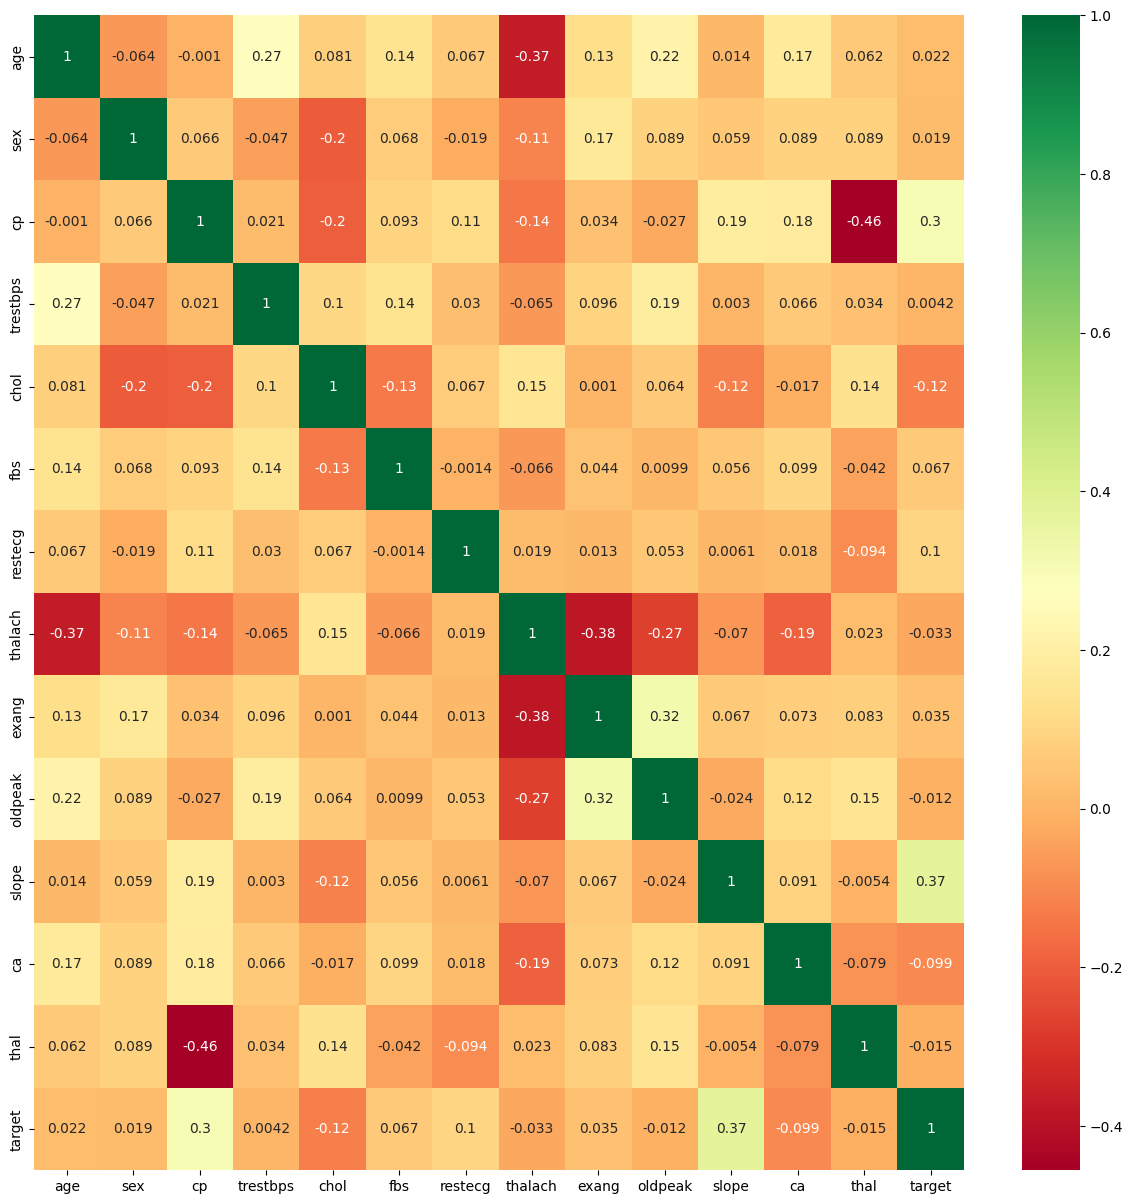

In [54]:
#plotting the corelation matrix to find the relation between the tables

corrmat = df1.corr() # df1 is the merged Data set
top_corr_features = corrmat.index
plt.figure(figsize= (15,15))
g=sns.heatmap(df1[top_corr_features].corr(),annot= True,cmap="RdYlGn")
plt.show()


In [55]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#corrmat = df1.corr()  # df1 is the merged Data set
#top_corr_features = corrmat.index
#plt.figure(figsize=(10, 10))
#g = sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap="RdYlGn")
#plt.tight_layout()
#plt.show()

In [56]:
co= corrmat['target'].abs().sort_values(ascending=False)

# Print the correlation values
print("Correlation with target variable:")
print(co)

Correlation with target variable:
target      1.000000
slope       0.373203
cp          0.301941
chol        0.120484
restecg     0.100507
ca          0.099188
fbs         0.067293
exang       0.034880
thalach     0.033338
age         0.021989
sex         0.018609
thal        0.014701
oldpeak     0.011686
trestbps    0.004220
Name: target, dtype: float64


In [57]:
#plt.figure(figsize=(10, 6))
##plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
#plt.xlabel('Features')
#plt.ylabel('Importance Score')
#plt.title('Feature Importance')
#plt.tight_layout()
#plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

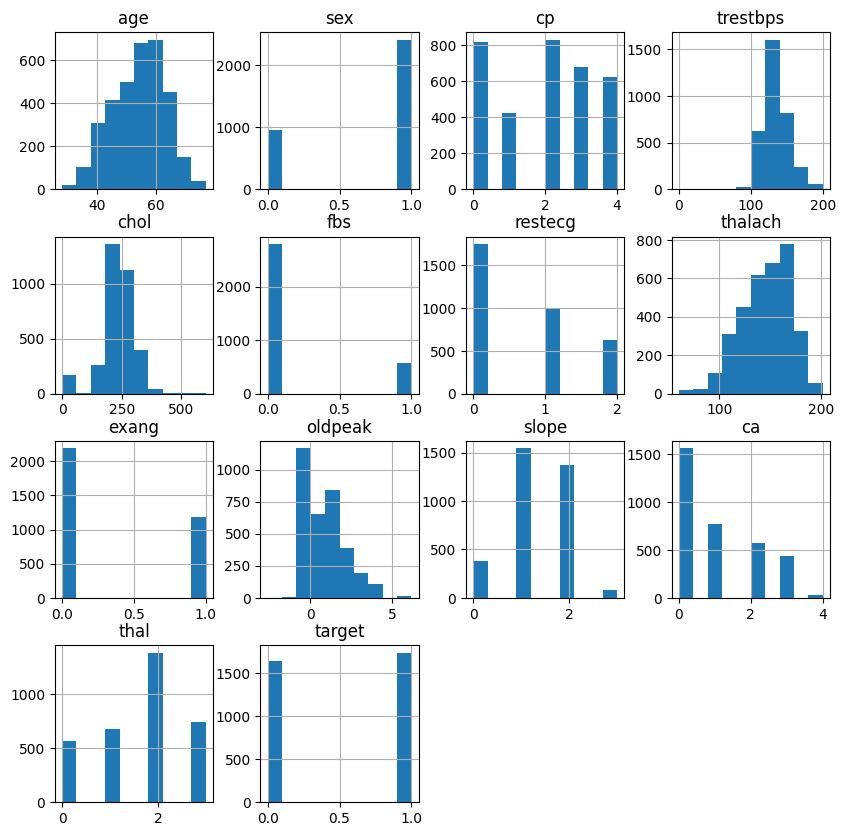

In [58]:
df1.hist(figsize=(10, 10))


# **description of every column**

<Axes: xlabel='target', ylabel='count'>

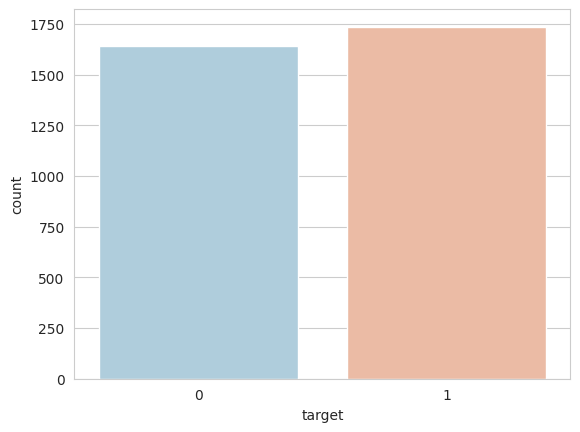

In [59]:
#target column
sns.set_style('whitegrid')
sns.countplot(x='target', data=df1,palette='RdBu_r')

In [60]:
CND= len(df1[df1.target ==0])
CD= len(df1[df1.target ==1])

print("Percentage of patients having disease: {:.2f}%".format((CND/ (len(df1.target))*100)))
print("Percentage of patient not having disease {:.2f}%".format((CD/ (len(df1.target))*100)))

Percentage of patients having disease: 48.58%
Percentage of patient not having disease 51.42%


Text(0.5, 1.0, 'Disease count distribution by sex')

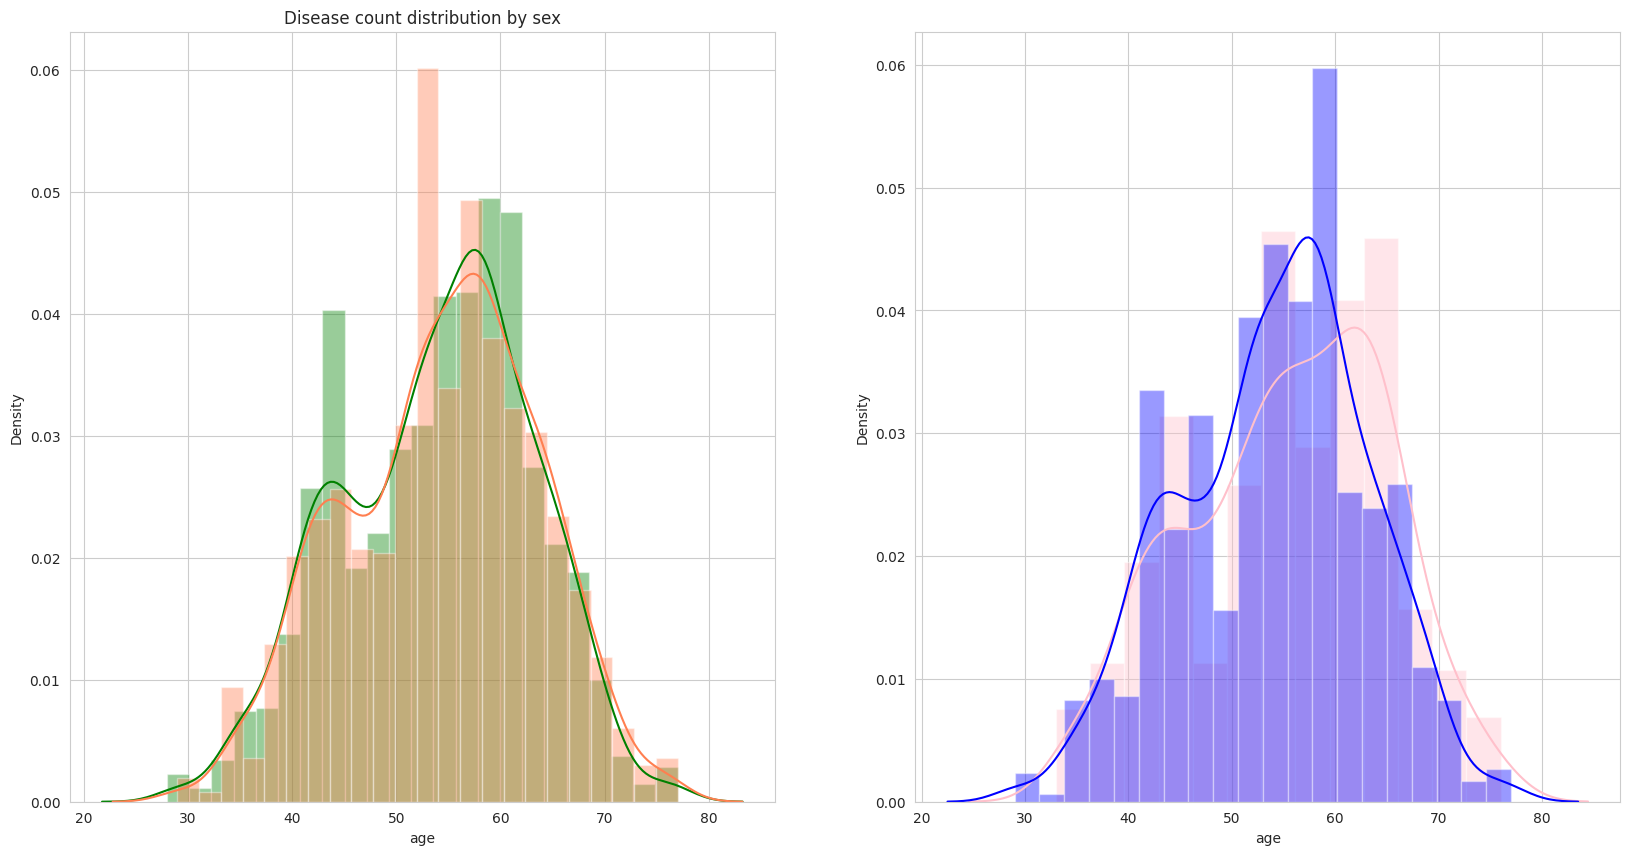

In [61]:
#sex,age vs diseased
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(df1['age'][df1['target']==0], ax = ax1, color='green')
sns.distplot(df1['age'][df1['target']==1], ax = ax1, color='coral')
ax1.set_title('Age Distribution')
sns.distplot(df1['age'][(df1['sex']==0)& (df1['target']==1)], ax = ax2, color='pink')
sns.distplot(df1['age'][(df1['sex']==1)& (df1['target']==1)], ax = ax2, color='blue')
ax1.set_title('Disease count distribution by sex')




[Text(0, 0, 'female'), Text(1, 0, 'male')]

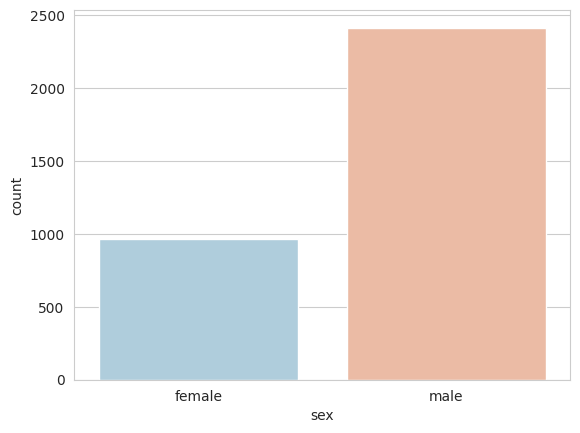

In [62]:
#male and female
sns.set_style('whitegrid')
sns.countplot(x='sex', data=df1,palette='RdBu_r')
plt.gca().set_xticklabels(['female', 'male'])

In [63]:
CountFemale= len(df1[df1.sex ==0])
CountMale= len(df1[df1.sex ==1])

print("Percentage of female patient: {:.2f}%".format((CountFemale/ (len(df1.sex))*100)))
print("Percentage of Male patient: {:.2f}%".format((CountMale/ (len(df1.sex))*100)))

Percentage of female patient: 28.51%
Percentage of Male patient: 71.49%


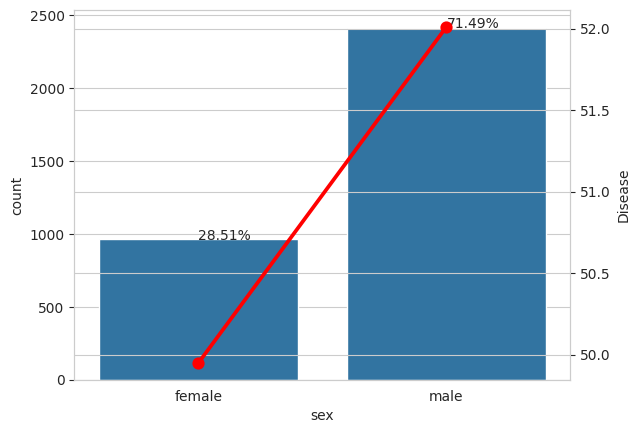

In [64]:
fig, ax = plt.subplots(1, 1)
t = pd.crosstab(df1['sex'], df1['target'], normalize='index').round(4) * 100
t.reset_index(inplace=True)
t.columns = ['sex', 'NotDiseased', 'Disease']
ax1 = sns.countplot(data=df1, x='sex', order=[0,1])
ax2 = ax1.twinx()
sns.pointplot(x=t.index, y=t['Disease'], order=t.index, ax=ax2, color='red')
ax1.set_xticklabels(['female', 'male'])  # Set the x-axis labels manually
for x in ax1.patches:
    height = x.get_height()
    ax1.text(x.get_x() + x.get_width() / 2,height,'{:.2f}{}'.format((height / len(df1)) * 100, '%'))
plt.show()

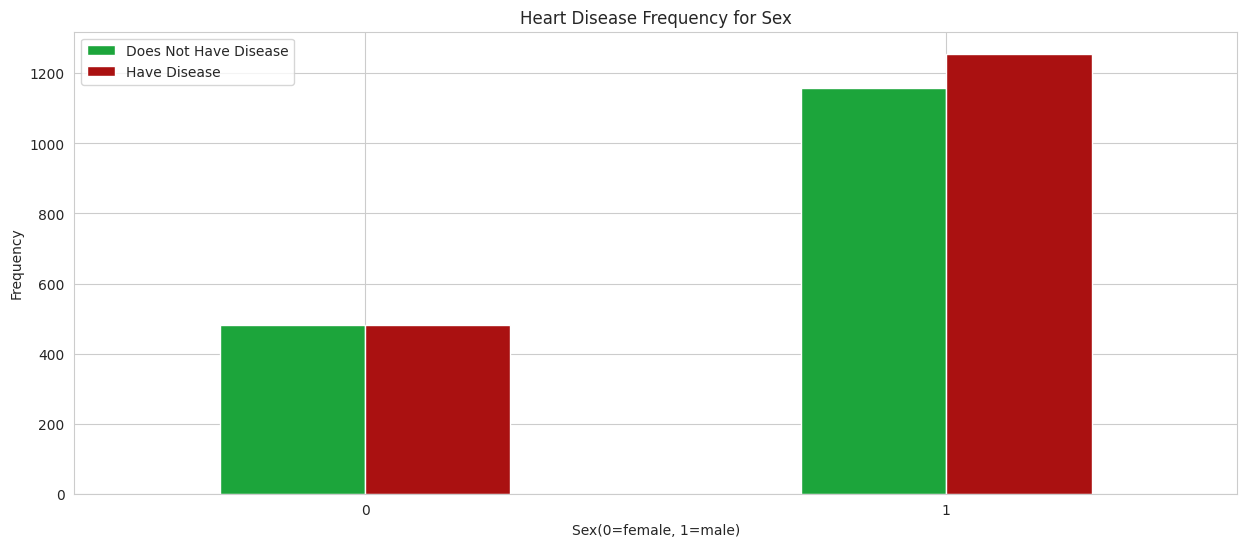

In [65]:
pd.crosstab(df1.sex,df1.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex(0=female, 1=male)')
plt.xticks(rotation=0)
plt.legend(["Does Not Have Disease","Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [66]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,0
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0


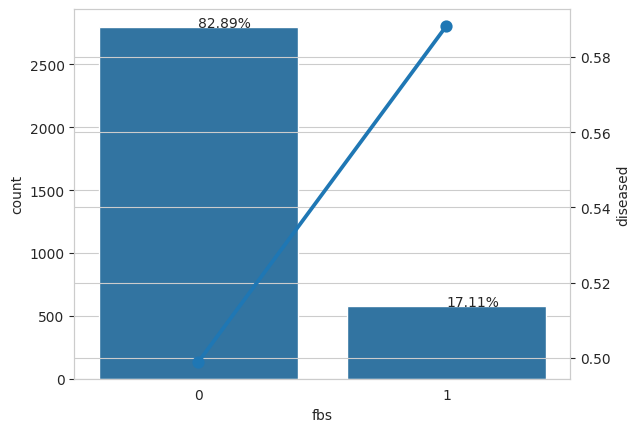

In [67]:
#fbs
a = pd.crosstab(df1['fbs'], df1['target'], normalize='index')
a.reset_index(inplace=True)
a.columns = ['not diseased','','diseased']

fig, ax = plt.subplots(1, 1)
sns.countplot(x='fbs', data=df1, order=a.index, ax=ax)
plot2 = ax.twinx()
sns.pointplot(x=a.index, y=a['diseased'], order=a.index, ax=plot2)

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, '{:.2f}{}'.format(height / len(df1['fbs']) * 100, '%'))

plt.show()

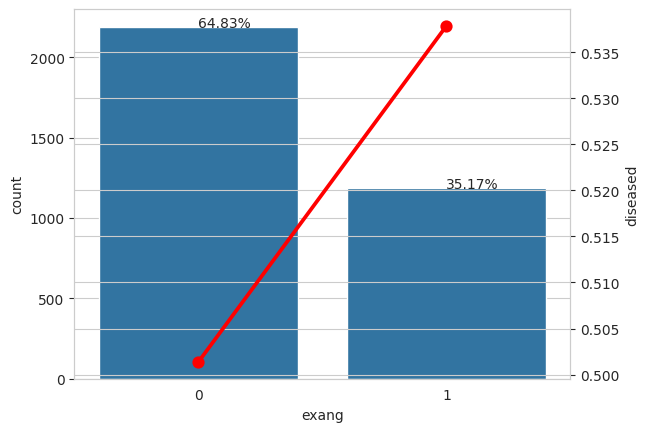

In [68]:
a = pd.crosstab(df1['exang'], df1['target'], normalize='index')
a.reset_index(inplace=True)
a.columns = ['not diseased','','diseased']

fig, ax = plt.subplots(1, 1)
sns.countplot(x='exang', data=df1, order=a.index, ax=ax)
plot2 = ax.twinx()
sns.pointplot(x=a.index, y=a['diseased'], order=a.index, ax=plot2,color='red')

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, '{:.2f}{}'.format(height / len(df1['exang']) * 100, '%'))

plt.show()

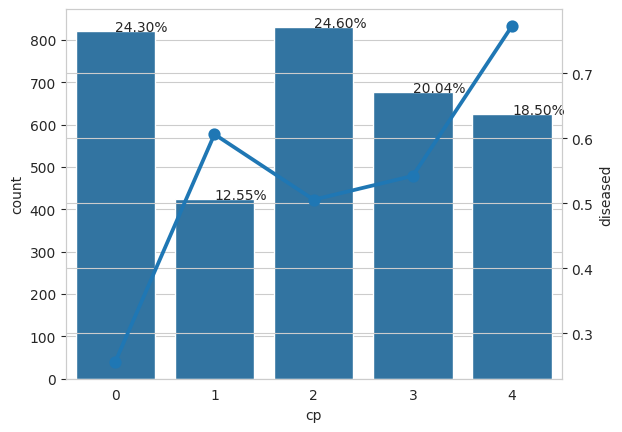

In [69]:
#cp
b = pd.crosstab(df1['cp'], df1['target'], normalize='index')
b.reset_index(inplace=True)
b.columns = ['not diseased','2', 'diseased']

fig, ax = plt.subplots(1, 1)
sns.countplot(x='cp', data=df1, order=b.index, ax=ax)
plot2 = ax.twinx()
sns.pointplot(x=b.index, y=b['diseased'], order=b.index, ax=plot2)

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, '{:.2f}{}'.format(height / len(df1['cp']) * 100, '%'))

plt.show()

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(df1['cp'][df1['target']==0], ax = ax1, color='green')
sns.distplot(df1['cp'][df1['target']==1], ax = ax1, color='coral')
ax1.set_title('chest pain')
sns.distplot(df1['cp'][(df1['cp']==0)& (df1['target']==0)], ax = ax2, color='blue')
sns.distplot(df1['cp'][(df1['cp']==1)& (df1['target']==1)], ax = ax2, color='red')
sns.distplot(df1['cp'][(df1['cp']==2)& (df1['target']==1)], ax = ax2, color='red')
sns.distplot(df1['cp'][(df1['cp']==3)& (df1['target']==1)], ax = ax2, color='red')
sns.distplot(df1['cp'][(df1['cp']==4)& (df1['target']==1)], ax = ax2, color='red')
ax2.set_title('Disease count distribution by chest pain')




Text(0.5, 1.0, 'Disease count distribution by chest pain')

In [ ]:
#restecg
a = pd.crosstab(df1['restecg'], df1['target'], normalize='index')
a.reset_index(inplace=True)
a.columns = ['not diseased','1','diseased']

fig, ax = plt.subplots(1, 1)
sns.countplot(x='restecg', data=df1, order=a.index, ax=ax)

plot2 = ax.twinx()
sns.pointplot(x=a.index, y=a['diseased'], order=a.index, ax=plot2)

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, '{:.2f}{}'.format(height / len(df1['restecg']) * 100, '%'))

plt.show()





In [ ]:
#slope
c = pd.crosstab(df1['slope'], df1['target'], normalize='index')
c.reset_index(inplace=True)
c.columns = ['not diseased','1','diseased']

fig, ax = plt.subplots(1, 1)
sns.countplot(x='slope', data=df1, order=c.index, ax=ax)

plot2 = ax.twinx()
sns.pointplot(x=c.index, y=c['diseased'], order=c.index, ax=plot2)

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, '{:.2f}{}'.format(height / len(df1['slope']) * 100, '%'))

plt.show()

In [ ]:
d = pd.crosstab(df1['ca'], df1['target'], normalize='index')
d.reset_index(inplace=True)
d.columns = ['not diseased','1','diseased']

fig, ax = plt.subplots(1, 1)
sns.countplot(x='ca', data=df1, order=d.index, ax=ax)

plot2 = ax.twinx()
sns.pointplot(x=d.index, y=d['diseased'], order=d.index, ax=plot2)

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, '{:.2f}{}'.format(height / len(df1['ca']) * 100, '%'))

plt.show()

In [ ]:
#thal
a = pd.crosstab(df1['thal'], df1['target'], normalize='index')
a.reset_index(inplace=True)
a.columns = ['not diseased', '1', 'diseased']

fig, ax = plt.subplots(1, 1)
sns.countplot(x='thal', data=df1, order=a.index, ax=ax)

plot2 = ax.twinx()
sns.pointplot(x=a.index, y=a['diseased'], order=a.index, ax=plot2)

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, '{:.2f}{}'.format(height / len(df1['thal']) * 100, '%'))

plt.show()

In [ ]:
#cholestrol
diseased= df1[df1['target'] == 1]
non_diseased= df1[df1['target'] == 0]

# Group cholesterol values
d1= diseased.groupby('chol').size().reset_index(name='count')
d2 = non_diseased.groupby('chol').size().reset_index(name='count')

# Combine the grouped data into a single DataFrame
combined_data = pd.concat([d1,d2], axis=1)
combined_data.columns = ['Cholesterol', 'Diseased', 'Cholesterol', 'Non-Diseased']

# Plotting the cholesterol levels using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_data[['Diseased', 'Non-Diseased']])
plt.xlabel('Disease Status')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Level Distribution by Disease Status')
plt.show()

In [ ]:
#oldpeak
sns.scatterplot(data=df1, x='oldpeak', y='target')

# Adding a linear regression line to the plot
sns.regplot(data=df1, x='oldpeak', y='target')

# Adding a title and labels to the plot
plt.title('Old Peak vs Diseased')
plt.xlabel('Old Peak')
plt.ylabel('Diseased')

# Show the plot
plt.show()



In [ ]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df1, x='target', y='oldpeak', color='blue', alpha=0.7)
sns.boxplot(data=df1, x='target', y='oldpeak', color='lightgray')

# Adding labels and title to the plot
plt.xlabel('Heart Disease')
plt.ylabel('Old Peak')
plt.title('Distribution of Old Peak by Heart Disease')

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.histplot(data=df1, x='oldpeak', hue='target', multiple='layer', bins=20, kde=True, palette='husl')

plt.xlabel('Old Peak')
plt.ylabel('Density')
plt.title('Old Peak by Heart Disease')

plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.histplot(data=df1, x='chol', hue='target', multiple='layer', bins=20, kde=True, palette='husl')

plt.xlabel('cholestrol')
plt.ylabel('Density')
plt.title('Ridge Plot of Cholestrol by Heart Disease')

plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.histplot(data=df1[df1['target'] == 1], x='chol', bins=20, kde=True, palette='husl')

plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.title('Cholesterol Level for Heart Disease')

plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.histplot(data=df1[df1['target'] == 0], x='chol', bins=20, kde=True, palette='husl')

plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.title(' Cholesterol Level for No Heart Disease')

plt.show()

In [ ]:
diseased = df1[df1['target'] == 1]
non_diseased = df1[df1['target'] == 0]

# Plotting the cholesterol levels
plt.figure(figsize=(8, 6))
plt.bar(['Diseased', 'Non-Diseased'], [diseased['trestbps'].mean(), non_diseased['trestbps'].mean()])
plt.xlabel('Disease Status')
plt.ylabel('Cholesterol Level')
plt.title('Average Cholesterol Level by Disease Status')
plt.show()









In [ ]:
grouped_data = df1.groupby('target')['trestbps'].mean()

# Plotting the average cholesterol level by disease status
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Disease Status')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Level by Disease Status')
plt.xticks([0, 1], ['Non-Diseased', 'Diseased'])
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='target', y='thalach', palette='bwr', inner='stick')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Violin Plot with Individual Data Points of Maximum Heart Rate Achieved by Heart Disease')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.histplot(data=df1, x='thalach', hue='target', multiple='layer', bins=20, kde=True, palette='husl')

plt.xlabel('thalach ')
plt.ylabel('Density')
plt.title('Ridge Plot of thalach by Heart Disease')

plt.show()

In [ ]:
#df1['cp'] = df1['cp'].replace('3', '1')

#replacement_dict = {2: 0, 3: 1}
#df1['cp'] = df1['cp'].replace(replacement_dict)


# **bold text**
DATA PROCESSING


In [ ]:

#making some dummy values
main = pd.get_dummies(df1, columns =['sex','cp','fbs', 'restecg','exang' ,'slope' ,'ca','thal'])

In [ ]:
df1.dtypes

In [ ]:
#scaling the data for proper output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
St= StandardScaler()
scale=['cp', 'fbs', 'restecg', 'slope', 'ca']
scaled_data=St.fit_transform(df1[scale])


In [ ]:
y= df1['target']
X= df1.drop(['target'], axis=1)


In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores= []
for k in range(1,15):
  knn_classifier = KNeighborsClassifier(n_neighbors= k)
  score=cross_val_score(knn_classifier,X,y,cv=10)
  knn_scores.append(score.mean())

In [ ]:
plt.plot([k for k  in range(1,15)], knn_scores, color = 'red')
plt.figure(figsize=(20, 20))
for i in range(1,15):
     plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,15)])
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different k values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors= 1)
score=cross_val_score(knn_classifier,X,y,cv=15)
knn_scores.append(score.mean())
score

In [ ]:

score.mean()

In [ ]:
X =df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1['target']

col = range(1, 16)  # Change this range according to your needs

r = []

for estimators in col:
    rf= RandomForestClassifier(n_estimators=estimators)
    score = cross_val_score(rf, X, y, cv=15)
    r.append(score.mean())

In [ ]:

X = df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1['target']

col = range(1, 16)

r = []

for estimators in col:
    rf = RandomForestClassifier(n_estimators=estimators)
    score = cross_val_score(rf, X, y, cv=15)
    r.append(score.mean())

# Create a list of tuples containing the estimator count and its corresponding mean score
results = list(zip(col, r))

# Sort the results based on mean score in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

print("Estimators | Mean Score")
print("-----------------------")
for estimators, mean_score in sorted_results:
    print(f"{estimators:9d} | {mean_score:.6f}")

In [ ]:
np.random.seed(2000)
X = df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1['target']

col = range(1, 16)

r = []

for estimators in col:
    rf = RandomForestClassifier(n_estimators=estimators)
    score = cross_val_score(rf, X, y, cv=15)
    r.append(score.mean())

# Create a list of tuples containing the estimator count and its corresponding mean score
results = list(zip(col, r))

# Sort the results based on mean score in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Print the order of columns being used
a = sorted_results[0][0]
brf = RandomForestClassifier(n_estimators=a)
brf.fit(X, y)
selected_columns = X.columns[brf.feature_importances_.argsort()[::-1]]

print("Order of columns being used:")
for idx, column in enumerate(selected_columns, start=1):
    print(f"{idx}. {column}")

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(col,r, marker='o')
plt.title('Random Forest Classifier Performance')
plt.xlabel('Number of columns')
plt.ylabel('Mean Score')
plt.xticks(col)
plt.grid(True)
plt.show()

In [ ]:
r

# **Feature selection**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Define the input features (X) and the target variable (y)
X = df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1['target']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply feature selection using chi-square test
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_new = selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)].tolist()

# Print the selected features
print("Selected Features:", selected_features)

In [ ]:
from sklearn.model_selection import train_test_split
input_cols = ['cp', 'fbs', 'restecg', 'slope', 'ca']

# Count the number of rows in the 'input_cols' subset of the 'merged' DataFrame
num_rows = merged[input_cols].shape[0]
print("Number of rows in merged[input_cols]:", num_rows)

# Split the data into training and testing sets
tr,tr1, te,te1 = train_test_split(merged[input_cols],merged['target'], test_size=0.2, random_state=2000)

print("Training Heart Data set:", tr.shape[0])
print("Testing Heart Data set:", te.shape[0])

In [ ]:
# Define the input feature columns
input_cols = ['cp', 'fbs', 'restecg', 'slope', 'ca']

# Apply standard scaling to the input columns
scaler = StandardScaler()
merged[input_cols] = scaler.fit_transform(merged[input_cols])

# Assemble the features into a vector
assembled = np.array(merged[input_cols])

# Print the schema and show the transformed data
print(merged.head())
print(assembled)

# **DATA MINING TECHNIQUES**

In [ ]:


input_cols = ['cp', 'fbs', 'restecg', 'slope', 'ca']
target_col = 'target'
X_train, X_test, y_train, y_test = train_test_split(df1[input_cols], df1[target_col], test_size=0.2, random_state=2000)
print("training data=", X_train.shape[0])
print("testing data=",y_train.shape[0])

# **LOGISTIC REGRESSION**

In [ ]:
#logistic regression

from sklearn.linear_model import LogisticRegression
l= LogisticRegression()
l.fit(X_train,y_train)
l.score(X_test,y_test)
predictions = l.predict(X_test)
print(f'Accuracy: {l.score(X_test,y_test)}')
print(f'Prediction: {l.predict(X_test)}')

In [ ]:
#confusion mattrix
y_true = y_test  # True labels of the target variable
y_pred = l.predict(X_test)  # Predicted labels by your model

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract TP, TN, FP, FN values from the confusion matrix
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)

In [ ]:
#f1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_true,y_pred)

print("F1 score:", f1)

In [ ]:
#specificity
specificity = tn / (tn + fp)

print("Specificity:", specificity)

In [ ]:
#Sensitivity
Sensitivity = tp / (tp +fn)
print("Sensitivity:", Sensitivity)


In [ ]:
labels = ['Negative', 'Positive']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# Add text annotations to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="red" if cm[i, j] > thresh else "black")

# Display additional metrics
plt.tight_layout()
plt.show()

# **DECISION TREE**

In [ ]:
#Decision tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
print(f'Accuracy: {dt.score(X_test,y_test)}')

In [ ]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=10)
dt1.fit(X_train,y_train)
dt1.score(X_test,y_test)
print(f'Accuracy: {dt1.score(X_test,y_test)}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ran= RandomForestClassifier(n_estimators=15)
sc= cross_val_score(ran,X_test,y_test,cv=10)
sc


In [ ]:
sc.mean()

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ran= RandomForestClassifier(n_estimators=15)
sc= cross_val_score(ran,X,y,cv=10)
sc


In [ ]:
sc.mean()

In [ ]:
ran = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
sc = cross_val_score(ran, X, y, cv=10)
print("Cross-validated Scores:", sc)
print("The accurcy for Random Forest is",sc.mean())

# **Gradiant boost**

In [ ]:
#GRADIANT BOOST
from xgboost import XGBClassifier
x= XGBClassifier()
x.fit(X_train,y_train)
print(f'Accuracy: {x.score(X_test,y_test)}')

In [ ]:
#PREDICTION SCORE
from sklearn.ensemble import GradientBoostingClassifier

g= GradientBoostingClassifier()
g.fit(X_train,y_train)
print(f'Accuracy: {g.score(X_test,y_test)}')

In [ ]:
g = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8)
g.fit(X_train,y_train)
print(f'Accuracy: {g.score(X_test,y_test)}')


In [ ]:
classifiers = ["Logistic Regression","Decision Tree","Decision Tree(Tuned)","Random Forest","Random Forest(Tuned)", "K-Nearest Neighbors"]
accuracies = [0.741,0.788, 0.792,0.935, 0.941, 0.926]  # Replace with your actual accuracy values
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color='red')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim([0, 1])  # Set y-axis limits between 0 and 1
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

In [ ]:
classifiers = ["Logistic Regression", "Decision Tree", "Random Forest","xgboost", "Gradient Boosting", "K-Nearest Neighbors"]
accuracies = [0.741, 0.792, 0.941,0.797, 0.792, 0.926]  # Replace with your actual accuracy values

plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color='red')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim([0, 1])  # Set y-axis limits between 0 and 1
plt.xticks(rotation=45)

# Adding text annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

# **Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_



In [ ]:
# Train a gradient boosting model with the best parameters
g = GradientBoostingClassifier(**best_params)
g.fit(X_train, y_train)

# Calculate the score on the test data
score = g.score(X_test, y_test)

# Print the best parameters, best score, and test score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Score:", score)

In [ ]:
from sklearn.model_selection import GridSearchCV

 #Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

 #Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

 #Perform grid search on the training data
grid_search.fit(X_train, y_train)

 #Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
#Train a decision tree model with the best parameters
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

 #Calculate the score on the test data
score = dt.score(X_test, y_test)

 #Print the best parameters, best score, and test score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Score:", score)

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=10)

# Perform grid search on the data
grid_search.fit(X, y)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_



In [ ]:
# Create a random forest model with the best parameters
ran = RandomForestClassifier(**best_params)

# Calculate the cross-validated scores
sc = cross_val_score(ran, X, y, cv=10)

# Print the best parameters, best score, and cross-validated scores
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Cross-validated Scores:", sc)